In [34]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from datetime import datetime
result_dir = '/home/maeda/machine_learning/results/kikuchi-7vals_multi/'

predicts = []
high_cor = []
cor = np.zeros((35, 60))
box = [1, 3, 6, 10, 16, 21, 24, 36, 40]
#box = np.arange(11)
#for j in range(60):
for j in box:
    result_file = result_dir + f"cor/7val/result-value_7vals_35day{(j):03}.npz"

    df = np.load(result_file)
    predict = df['arr_0']
    y_test = df['arr_1']
    predicts.append(predict)
    for i in range(35):
        cor[i,j] = (np.sum(predict[:,2*i] * y_test[:,2*i]) + np.sum(predict[:,2*i+1] * y_test[:,2*i+1])) / \
            (np.sqrt(np.sum(predict[:,2*i] ** 2 + predict[:,2*i+1] ** 2)) * np.sqrt(np.sum(y_test[:,2*i] ** 2 + y_test[:,2*i+1] ** 2)))
    if cor[0,j] > 0.7:
        high_cor.append(j)

predicts = np.array(predicts)
print(predicts.shape, y_test.shape)
print(cor.shape)
print(cor[:,1])
print(high_cor)

(9, 2521, 70) (2521, 70)
(35, 60)
[0.8221374  0.8342684  0.8418304  0.84493202 0.84414527 0.83937365
 0.82989228 0.8169121  0.80106146 0.78317832 0.76397978 0.74279955
 0.72045163 0.69782697 0.67567297 0.65531188 0.63675601 0.61962737
 0.60370716 0.58853254 0.57448432 0.56113297 0.54719638 0.53260432
 0.51728386 0.50102068 0.48413049 0.46695724 0.44931187 0.43126724
 0.41297325 0.39473083 0.37656739 0.35857061 0.34080667]
[1, 3, 6, 10, 16, 21, 24, 36, 40]


In [58]:
print(predicts[0,0,:])

[-1.027259    0.35961068 -1.0026083   0.49038398 -0.95684195  0.61884654
 -0.88941693  0.7434056  -0.8042828   0.85707074 -0.7049074   0.95770335
 -0.5850158   1.0486071  -0.45039916  1.1267966  -0.29929614  1.1841276
 -0.13601518  1.2232425   0.02746344  1.2427664   0.19380927  1.2317153
  0.35897148  1.1932362   0.5177884   1.1274768   0.66815996  1.0333657
  0.80643845  0.9215754   0.92262983  0.79045105  1.0222788   0.6459429
  1.101262    0.49192214  1.1545058   0.32969546  1.1907654   0.16904211
  1.2050587   0.01642275  1.1943753  -0.13183749  1.1658876  -0.27393758
  1.1197518  -0.40509915  1.0560724  -0.5313258   0.97779536 -0.6417304
  0.889783   -0.73878634  0.7888961  -0.82198477  0.6759125  -0.89049184
  0.5545318  -0.9414505   0.431432   -0.9763064   0.3092953  -0.9893446
  0.18821609 -0.98017645  0.06976402 -0.9487477 ]


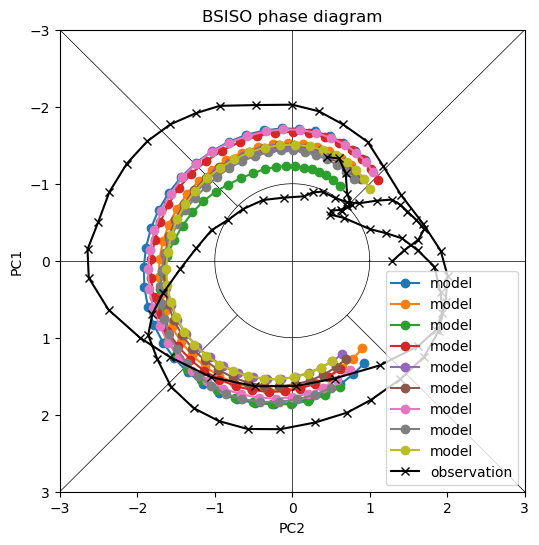

In [59]:
# plot
start = 150
stop  = 200
plt.figure(figsize=(6,6))
# r = 1 の円
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y, 'k', linewidth=0.5)
# 中心線
plt.hlines(0, -3, 3, 'k', linewidth=0.5)
plt.vlines(0, -3, 3, 'k', linewidth=0.5)
# 斜線
plt.plot([-3, -np.sqrt(2)/2], [-3, -np.sqrt(2)/2], 'k', linewidth=0.5)
plt.plot([np.sqrt(2)/2, 3], [np.sqrt(2)/2, 3], 'k', linewidth=0.5)
plt.plot([-3, -np.sqrt(2)/2], [3, np.sqrt(2)/2], 'k', linewidth=0.5)
plt.plot([np.sqrt(2)/2, 3], [-np.sqrt(2)/2, -3], 'k', linewidth=0.5)
lt = np.arange(35)
for seed in range(9):
    plt.plot(predicts[seed, stop, 2*lt+1], predicts[seed, stop, 2*lt], 'o', linestyle='-', label='model')
    #plt.plot(pred[lt][start,1], pred[lt][start,0], 's', markersize=10)
plt.plot(y_test[start:stop+35,1], y_test[start:stop+35,0], 'x',color='k', linestyle='-', label='observation')
#plt.plot(sup[0][start,1], sup[0][start,0], 's', markersize=10)
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.title('BSISO phase diagram')
plt.xlim(-3, 3)
plt.ylim(3, -3)
plt.legend()